In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('advertising.csv',encoding='latin-1')

In [4]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [10]:
# Hear No any misiing values and not any duplicate values
# so it is a clean dataset

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

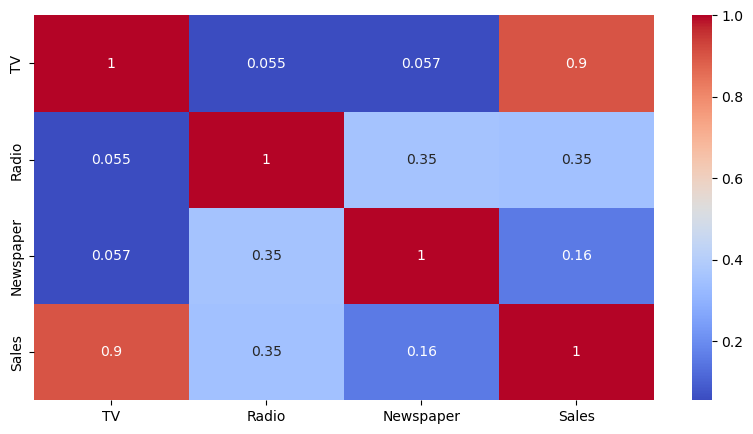

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Figure size 1000x600 with 0 Axes>

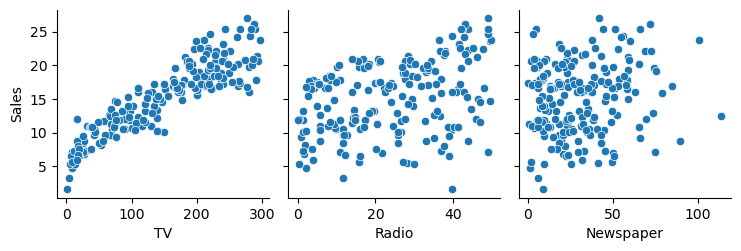

In [13]:
plt.figure(figsize=(10,6))
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales')
plt.show()

In [14]:
# from both the graph we can say that TV advertising expenditures have a moderately 
# strong positive linear relationship with sales as compare to TV and Radio.

In [15]:
X = df.drop(columns='Sales')
Y =df[['Sales']]

In [16]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
Y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [18]:
# Split the dataset into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [19]:
X_train.shape

(150, 3)

In [20]:
X_test.shape

(50, 3)

In [21]:
Y_train.shape

(150, 1)

In [22]:
Y_test.shape

(50, 1)

In [23]:
# creating the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [25]:
# Evaluate the model performance
MSE = mean_squared_error(Y_test,Y_pred)
print(MSE)

MAE = mean_absolute_error(Y_test,Y_pred)
print(MAE)

R2 = r2_score(Y_test,Y_pred)
print(R2)

3.0474516548799175
1.4458996407002338
0.899488312197457


In [26]:
df_final = X_test
df_final['Predicted_Rating'] = Y_pred
df_final

,TV,Radio,Newspaper,Predicted_Rating
186,139.5,2.1,26.6,12.416110
24,62.3,12.6,18.3,9.506723
183,287.6,43.0,71.8,24.624426
78,5.4,29.9,9.4,8.435440
162,188.4,18.1,25.6,16.799580
170,50.0,11.6,18.4,8.740117
62,239.3,15.5,27.3,19.214975
41,177.0,33.4,38.7,17.825790
134,36.9,38.6,65.6,10.810194
33,265.6,20.0,0.3,21.243569
